# 机器学习——04朴素贝叶斯

## 参考资料

1. [AIlearning](https://ailearning.apachecn.org/#/docs/ml/2)
2. [Machine-Learning-in-Action](https://github.com/TeFuirnever/Machine-Learning-in-Action)
3. 庞善民.西安交通大学机器学习导论2022春PPT

更多原理请参考本人另一篇博客：[[机器学习导论]——第六课——贝叶斯分类器](https://blog.csdn.net/weixin_47692652/article/details/124309268)

使用Jupyter进行练习，python3

## 一、知识准备

### 贝叶斯公式

针对两个随机变量，联合概率分布具有两种分解形式
$$
P(x,y)=P(x|y)P(y)=P(y|x)P(x)
$$
因此，利用上式得到贝叶斯公式

$$
P(c|x)=\frac{P(x|c)P(c)}{P(x)}
$$

通过贝叶斯公式得到贝叶斯决策理论基本思想：

1️⃣ 已知**类条件概率**密度参数表达式$P(x|c)$和**先验概率**$P(c)$

2️⃣ 利用贝叶斯公式转换成**后验概率**

3️⃣ 根据后验概率大小进行决策分类

> **先验概率（prior probability）**：指根据以往经验和分析。在实验或采样前就可以得到的概率。
>
> **后验概率（posterior probability）**：指某件事已经发生，想要计算这件事发生的原因是由某个因素引起的概率。
>
> **类条件概率密度**是，假定x是一个连续随机变量，其分布取决于类别状态，表示成p(x|ω)的形式，这就是“类条件概率密度”函数，即**类别状态为ω时的x的**[概率密度函数](https://baike.baidu.com/item/概率密度函数/5021996)（有时也称为状态条件概率密度）。

### 贝叶斯决策基础

贝叶斯分类决策利用概率对数据进行建模，从而基于**贝叶斯定理**给出分类预测的不确定性

将特征向量$x=(x_1,...,x_p)^T$类别标签𝑐𝑗作为**随机变量**

给定样本𝒙,基于条件（后验）概率$P(c_i|x)$计算将样本𝒙分类为𝑐𝑖所产生的期望损失
$$
R(c_i|\pmb x)= \sum_{j=1}^L\lambda_{ij}P(c_j|\pmb x)
$$
其中,$\lambda_{ij}$是将一个真实标记为$c_j$的样本误分类为$c_i$所产生的损失

贝叶斯判定准则要求 <mark>期望损失达到最小 </mark>。
$$
h^*(x)=\text{argmin}\ R(c|x)
$$
称$h^*(x)$为贝叶斯最优分类器

进一步，若目标是最小化分类错误率，则

![image-20220321171559820](https://img-blog.csdnimg.cn/img_convert/f44f6a3401e67dedb196f3fb6aa7b142.png)

期望损失可以写成
$$
R(c_i|x)=P(c_1|x)+...+P(c_{i-1}|x)+P(c_{i+1}|x)+...+P(c_{L}|x)=1-P(c_i|x)
$$
于是，对每个样本，选择使**后验概率最大的类别标记**
$$
c_{MAP}=\underset{c_j\in C}{\text{argmax}}\ P(c_j|x_1,x_2,...,x_p)
$$

## 二、MAP分类准则

估计后验概率𝑃(𝑐|𝑥)的方法主要有两种策略：

1️⃣ **判别式模型**：通过对𝑃(𝑐|𝑥)直接建模预测
![在这里插入图片描述](https://img-blog.csdnimg.cn/d47ac1f949fc4706adee757efaaeccd8.png)

逻辑回归：
$$
P(c|x;\theta)=(f_\theta(x))^c(1-f_\theta(x))^{1-c}\\
c\in{0,1}\ f_{\theta}(x)=\frac{1}{1+e^{-\theta^Tx}}
$$
**直接对条件概率建模，不关心背后的数据分布**$P(x,c)$

2️⃣ **生成式模型**：使用贝叶斯推理预测，即假定类条件概率具有某种确定的概率分布

![image-20220321171808451](https://img-blog.csdnimg.cn/img_convert/39af1b5b73a151f71f9805fc6ec3040c.png)

先对联合概率分布𝑃(𝑥,𝑐)建模，再通过贝叶斯公式计算后验概率𝑃(𝑐|𝑥)

![image-20220420162438848](https://img-blog.csdnimg.cn/img_convert/1a7db8476e399864e298c90ddcd2cf0f.png)

先对联合概率分布 𝑃(𝑥, 𝑐) 建模，再通过贝叶斯公式计算后验概率 𝑃( 𝑐| 𝑥)

GANs：适用于娱乐行业

## 三、贝叶斯分类算法

### 一般生成式贝叶斯分类器

#### 公式说明

基于贝叶斯公式估计后验概率：

![image-20220321172252379](https://img-blog.csdnimg.cn/img_convert/00d8c5a949c2793556f554caa3b48e2c.png)

使用最大后验概率准则给出类标签

![image-20220321172306382](https://img-blog.csdnimg.cn/img_convert/29b291369166c466894ecad453b5ec27.png)

#### 举例说明

例子：今天我们可以打网球吗？

训练示例集如下

![image-20220420164325967](https://img-blog.csdnimg.cn/img_convert/3e4e52f5ae2de131ff9769662366175f.png)

如果给一个新样本：X = (天气  = 晴, 气温  = 冷, 湿度  = 高, 风  = 有)，想知道是否可以打网球？

依据大数定律，利用样本出现频率估计先验概率

> 在试验不变的条件下，重复试验多次，随机事件的频率近似于它的概率。偶然中包含着某种必然。

![image-20220420164601250](https://img-blog.csdnimg.cn/img_convert/2c12d30feaeda2732c5d5635f95f5ef4.png)

其次，估计类条件概率

![image-20220420164825761](https://img-blog.csdnimg.cn/img_convert/6bef4d5570deab813a69ccab0ef28e52.png)

根据样本出现频率估计条件概率。但由于样本数远小于随机向量的可能取值数目，估计值通常不可靠

> 例如：$P(多云，热，高，无|Yes)=\frac{1}{9}\qquad P(多云，热，高，无|Yes)=\frac{0}{5}$
>
> <mark>未观测到≠出现概率为0</mark>

**训练过程**

**获得先验概率**
$$
P(X=Yes)=\frac{9}{14}\qquad P(C=No)=\frac{5}{14}
$$
**得到类条件概率表**

![image-20220420165625019](https://img-blog.csdnimg.cn/img_convert/23c6905c9a4e7887fdb8f03c86a3f8b6.png)

**测试阶段**

给定测试样本：X = (天气 = 晴, 气温 = 冷, 湿度 = 高, 风 = 有)， 通过查找条件概率表，可以得到
$$
P(X|Yes)P(C=Yes)=\frac{0}{9}\times =\frac{9}{14}=0\\
P(X|No)P(C=No)=\frac{0}{5}\times =\frac{5}{14}=0\\
$$
由此，基于贝叶斯公式:
$$
P(Yes|X)=0\qquad P(No|X)=0
$$
<mark>打和不打都是0，效果不好！</mark>

### 朴素贝叶斯分类器

#### 公式说明

朴素贝叶斯分类：对已知类别，**假设所有属性相互独立**（属性条件独立性假设）

![image-20220321173421760](https://img-blog.csdnimg.cn/img_convert/20df58d7296002948cb34deb6e4e3fe0.png)

因此朴素贝叶斯的分类公式为：

![image-20220321173455253](https://img-blog.csdnimg.cn/img_convert/4f12b1a2e25d71b380decff26d090fff.png)

在训练时，朴素贝叶斯为每个属性估计条件概率$P(x_i|c_j)$

假设样本的𝑝个属性都有𝑑种可能取值，则共需要估计𝑑𝑝个条件概率

> 朴素贝叶斯的朴素体现在其对各个条件的独立性假设上，加上独立假设后，大大减少了参数的假设空间：从$d^p$降到了𝑑𝑝。

#### 举例说明

例子：今天我们可以打网球吗？

训练示例集如下

![image-20220420164325967](https://img-blog.csdnimg.cn/img_convert/3e4e52f5ae2de131ff9769662366175f.png)

如果给一个新样本：X = (天气  = 晴, 气温  = 冷, 湿度  = 高, 风  = 有)，想知道是否可以打网球？

**需要估计**

> 先验$P(C=c_j)$
>
> 每个属性的条件概率$P(x_i|c_j)$

使用样本出现的概率
$$
\hat{P}(c_j)=\frac{N(C=c_j)}{N}\\
\hat{P}(x_i|c_j)=\frac{N(X_i=x_i,C=c_j)}{N(C=c_j)}
$$
对于打网球问题，有

先验概率：
$$
P(C=Yes)=9/14\qquad P(C=No)=5/14
$$
条件概率$P(X_i|C_j)$

![image-20220420203005417](https://img-blog.csdnimg.cn/img_convert/9695cbfb0c5aedeecd22c0533ab011bb.png)

测试步骤

> :one: 给定新样本：X = (天气 = 晴, 气温 = 冷, 湿度 = 高, 风 = 有)
>
> :two: 查先验和条件概率表
> $$
> P(C=Yes)=9/14\qquad P(C=No)=5/14
> $$
> ![image-20220420203149604](https://img-blog.csdnimg.cn/img_convert/8a952e189cc59ec370324b67fb6e43a4.png)
>
> :three: 计算后验概率
>
> ![image-20220420203315992](https://img-blog.csdnimg.cn/img_convert/600b38451841f9f3261981d7bfd72659.png)
>
> :four: 因为P(Yes|x)<P(No|x)，根据MAP准则，预测为"不打网球"

#### 避免0概率问题

若某个属性值在训练集中没有与某个类同时出现过，则基于频率的概率估计将为零

不合理：仅仅因为事件之前没有发生过，并不意味着它不会发生，为避免这一情况，**需要对概率值进行平滑**

解决方案：**使用拉普拉斯校正**
$$
\hat{P}(c_j)=\frac{N(C=c_j)+1}{N+|C|}\\
\hat{P}(x_i|c_j)=\frac{N(X_i=x_i,C=c_j)+1}{N(C=c_j)+|X_i|}\\
|C|\rightarrow 类的个数\qquad |X_i|\rightarrow 属性的取值数目
$$
例如：

![image-20220420203712736](https://img-blog.csdnimg.cn/img_convert/4b4aab80874123a11c88922ee3eecf28.png)
$$
P(X_1=多云|C=No)=\frac{0+1}{5+3}=\frac{1}{8}
$$
避免了因训练样本不足而导致的概率估值为0的问题。

## 四、朴素贝叶斯应用场景

机器学习的一个重要应用就是**文档的自动分类**。

在文档分类中，整个文档（如一封电子邮件）是实例，而电子邮件中的某些元素则构成特征。我们可以观察文档中出现的词，并把每个词作为一个特征，而每个词的出现或者不出现作为该特征的值，这样得到的特征数目就会跟词汇表中的词的数目一样多。

朴素贝叶斯是上面介绍的贝叶斯分类器的一个扩展，是用于文档分类的常用算法。下面我们会进行一些朴素贝叶斯分类的实践项目。

### 工作原理

- 提取所有文档中的词条并进行去重 

- 获取文档的所有类别 

- 计算每个类别中的文档数目 

- 对每篇训练文档:     

​	对每个类别:         

​		如果词条出现在文档中-->增加该词条的计数值（for循环或者矩阵相加）        

​		增加所有词条的计数值（此类别下词条总数） 

- 对每个类别:     

​	对每个词条:         

​		将该词条的数目除以总词条数目得到的条件概率（P(词条|类别)） 

- 返回该文档属于每个类别的条件概率（P(类别|文档的所有词条)）

### 开发流程

1. 
   收集数据: 可以使用任何方法。

2. 准备数据: 需要数值型或者布尔型数据。

3. 分析数据: 有大量特征时，绘制特征作用不大，此时使用直方图效果更好。

4. 训练算法: 计算不同的独立特征的条件概率。

5. 测试算法: 计算错误率。

6. 使用算法: 一个常见的朴素贝叶斯应用是文档分类。可以在任意的分类场景中使用朴素贝叶斯分类器，不一定非要是文本。


### 算法特点

- 优点: 在数据较少的情况下仍然有效，可以处理多类别问题。 
- 缺点: 对于输入数据的准备方式较为敏感。 
- 适用数据类型: 标称型数据。

## 五、项目案例1: 屏蔽社区留言板的侮辱性言论

### 项目概述

构建一个快速过滤器来屏蔽在线社区留言板上的侮辱性言论。如果某条留言使用了负面或者侮辱性的语言，那么就将该留言标识为内容不当。对此问题建立两个类别: 侮辱类和非侮辱类，使用 1 和 0 分别表示。

具体代码：[https://github.com/yijunquan-afk/machine-learning/blob/master/basic-learn/04-naive-bayesian/code/Naive_Bayesian_project1.py](https://github.com/yijunquan-afk/machine-learning/blob/master/basic-learn/04-plain-bayesian/code/Naive_Bayesian_project1.py)

### 开发流程

- 收集数据: 可以使用任何方法 
- 准备数据: 从文本中构建词向量 
- 分析数据: 检查词条确保解析的正确性 
- 训练算法: 从词向量计算概率 
- 测试算法: 根据现实情况修改分类器 
- 使用算法: 对社区留言板言论进行分类

### 收集数据

使用简单的数据集：




In [1]:
from numpy import *
def loadDataSet():
    """创建数据集

    Returns:
        postingList: 单词列表
        classVec   : 所属类别
    """    
    postingList = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'], #[0,0,1,1,1......]
                   ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                   ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                   ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0, 1, 0, 1, 0, 1]  # 1为正例
    return postingList, classVec    

### 准备数据

利用词袋模型将文本转换为向量

Bag of Words(BoW): 将文本转化为向量

如将下边的两个句子当作文本库：

```
Each state has its own laws.

Every country has its own culture.
```

词汇表为(不计标点符号)：
```
each state has its own laws every country culture
```

则两个句子分别转化成了如下向量：
```
(1,1,1,1,1,1,0,0,0)
(1,0,1,1,1,0,0,1,1)
```
![image-20221217120251145](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/image-20221217120251145.png)

向量定长，长度与词汇表长度一致，词频为词在句中出现的次数

In [2]:
def createVocabularyList(dataSet):
    """获取所有单词的集合

    Args:
        dataSet: 数据集
    Returns:
        不含重复元素的单词列表
    """
    voSet = set([])
    for document in dataSet:
        voSet = voSet | set(document)
    return list(voSet)

def bagofWords(voList, document):
    """使用词袋模型将文本转换为向量

    Args:
        voList: 词汇表
        document: 输入的句子

    Returns:
        returnVec: 单词向量
    """
    returnVec = zeros(len(voList))
    # 遍历文档中的所有单词，如果出现了词汇表中的单词，则将输出的文档向量中的对应值+1
    for word in document:
        if word in voList:
            returnVec[voList.index(word)] += 1
        else:
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec   

### 分析数据

检查函数执行情况，检查词表，不出现重复单词。

In [3]:
data,label = loadDataSet()
voList = createVocabularyList(data)
print(voList)

['how', 'garbage', 'to', 'flea', 'posting', 'steak', 'so', 'I', 'mr', 'him', 'love', 'ate', 'quit', 'dog', 'take', 'has', 'cute', 'licks', 'please', 'stop', 'food', 'buying', 'not', 'park', 'worthless', 'maybe', 'my', 'dalmation', 'problems', 'is', 'help', 'stupid']


In [4]:
# 对文档'my', 'dog', 'has', 'flea', 'problems', 'help', 'please'构建向量
bagofWords(voList=voList, document = data[0])

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

可见词向量构建成功

### 训练算法

从词向量计算概率

现在已经知道了一个词是否出现在一篇文档中，也知道该文档所属的类别。接下来我们重写贝叶斯准则，将之前的 x, y 替换为 w. 粗体的 w 表示这是一个向量，即它由多个值组成。在这个例子中，数值个数与词汇表中的词个数相同。

$$
p(c_i|\pmb w)=\frac{p(\pmb w|c_i)p(c_i)}{p(\pmb w)}
$$

我们使用上述公式，对每个类计算该值，然后比较这两个概率值的大小。

对于每个$c_i$，$P(w)$是固定的。并且我们只需要比较左边式子值的大小来决策分类，那么我们就可以简化为通过比较右边分子值得大小来做决策分类。

首先可以通过类别 $i$ (侮辱性留言或者非侮辱性留言)中的文档数除以总的文档数来计算概率 $p(c_i)$ 。接下来计算 $p(w | ci)$ ，这里就要用到朴素贝叶斯假设。如果将 w 展开为一个个独立特征，那么就可以将上述概率写作 $p(w_0, w_1, w_2...w_n | c_i)$ 。这里假设所有词都互相独立，该假设也称作条件独立性假设（例如 A 和 B 两个人抛骰子，概率是互不影响的，也就是相互独立的，A 抛 2点的同时 B 抛 3 点的概率就是 1/6 * 1/6），它意味着可以使用 $p(w_0 | c_i)p(w_1 | c_i)p(w_2 | c_i)...p(w_n | c_i)$ 来计算上述概率，这样就极大地简化了计算的过程。

在利用贝叶斯分类器对文档进行分类时，要计算多个概率的乘积以获得文档属于某个类别的概率，即计算 $p(w_0|1) * p(w_1|1) * p(w_2|1)$。如果其中一个概率值为 0，那么最后的乘积也为 0。为降低这种影响，可以将所有词的出现数初始化为 1，并将分母初始化为 2 ——**使用拉普拉斯校正**。

另一个遇到的问题是下溢出，这是由于太多很小的数相乘造成的。当计算乘积 $p(w_0|c_i) * p(w_1|c_i) * p(w_2|c_i)... p(w_n|_ci)$时，由于大部分因子都非常小，所以程序会下溢出或者得到不正确的答案。（用 Python 尝试相乘许多很小的数，最后四舍五入后会得到 0）。一种解决办法是对乘积取自然对数。在代数中有 $ln(a * b) = ln(a) + ln(b)$, 于是通过求对数可以避免下溢出或者浮点数舍入导致的错误。同时，采用自然对数进行处理不会有任何损失。

下图给出了函数 f(x) 与 ln(f(x)) 的曲线。可以看出，它们在相同区域内同时增加或者减少，并且在相同点上取到极值。它们的取值虽然不同，但不影响最终结果。

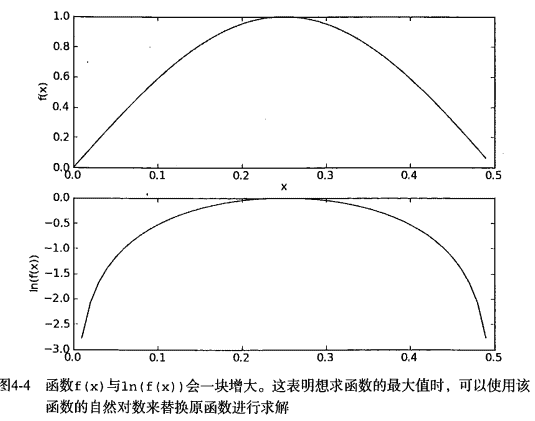

In [5]:
def trainNB(trainMatrix, trainLabel):
    """训练数据

    Args:
        trainMatrix (矩阵): 文档单词矩阵 [[1,0,1,1,1....],[],[]...]
        trainLabel (向量): 文档类别矩阵 [0,1,1,0....]
    """
    # 总文件数
    numTrainDocs = len(trainMatrix)
    # 总单词数
    numWords = len(trainMatrix[0])

    # 侮辱性文件的出现概率，即trainLabel中所有的1的个数，
    # 使用拉普拉斯平滑校正
    pc_1 = sum(trainLabel) / float(numTrainDocs)

    # 构造单词出现次数列表
    p0Num = zeros(numWords)  
    p1Num = zeros(numWords)

    # 整个数据集单词出现总数
    p0Denom = 0.0
    p1Denom = 0.0

    for doc in range(numTrainDocs):
        if trainLabel[doc] == 1:
            # 词在类中出现的次数
            p1Num += trainMatrix[doc]
            # 类中的总词数
            p1Denom += sum(trainMatrix[doc])
        else:
            p0Num += trainMatrix[doc]
            p0Denom += sum(trainMatrix[doc])
    # 使用log避免累乘数太小
    # 类别1的概率向量，使用拉普拉斯平滑校正
    p1Vect = log(p1Num + 1  / p1Denom + 2)
    # 类别0的概率向量，使用拉普拉斯平滑校正
    p0Vect = log(p0Num + 1 / p0Denom + 2)
    return p0Vect, p1Vect, pc_1  

### 测试算法

In [6]:
def classifyNB(inputData, p0Vec, p1Vec, pClass1):
    """使用朴素贝叶斯进行分类

    Args:
        inputData (向量): 待分类的数据
        p0Vec (向量): 类别1的概率向量
        p1Vec (向量): 类别2的概率向量
        pClass1 (数): 类别1文档的出现概率

    Returns:
        数: 分类结果
    """  
    # log的使用使乘法变为家法  
    # 使用 NumPy 数组来计算两个向量相乘的结果，这里的相乘是指对应元素相乘，
    # 即先将两个向量中的第一个元素相乘，然后将第2个元素相乘，以此类推。
    # 这里的 inputData * p1Vec 的意思就是将每个词与其对应的概率相关联起来
    p1 = sum(inputData * p1Vec) + log(pClass1) # P(w|c1) * P(c1) ，即贝叶斯准则的分子
    p0 = sum(inputData * p0Vec) + log(1.0 - pClass1) # P(w|c0) * P(c0) ，即贝叶斯准则的分子·
    if p1 > p0:
        return 1
    else:
        return 0


def testingNB():
    """
    测试朴素贝叶斯算法
    """
    # 1. 加载数据集
    listOPosts, listClasses = loadDataSet()
    # 2. 创建单词集合
    myVocabList = createVocabularyList(listOPosts)
    # 3. 计算单词是否出现并创建数据矩阵
    trainMat = []
    for postinDoc in listOPosts:
        # 返回m*len(myVocabList)的矩阵， 记录的都是0，1信息
        trainMat.append(bagofWords(myVocabList, postinDoc))
    # 4. 训练数据
    p0V, p1V, pAb = trainNB(array(trainMat), array(listClasses))
    # 5. 测试数据
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = array(bagofWords(myVocabList, testEntry))
    print( testEntry, 'classified as: ', classifyNB(thisDoc, p0V, p1V, pAb))
    testEntry = ['stupid', 'garbage']
    thisDoc = array(bagofWords(myVocabList, testEntry))
    print (testEntry, 'classified as: ', classifyNB(thisDoc, p0V, p1V, pAb))

testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


## 六、项目案例2: 过滤垃圾邮件

### 项目概述

完成朴素贝叶斯的一个最著名的应用: 电子邮件垃圾过滤。

具体代码：[https://github.com/yijunquan-afk/machine-learning/blob/master/basic-learn/04-naive-bayesian/code/Naive_Bayesian_project2.py](https://github.com/yijunquan-afk/machine-learning/blob/master/basic-learn/04-plain-bayesian/code/Naive_Bayesian_project2.py)

### 开发流程

1、收集数据: 提供文本文件

2、准备数据: 将文本文件解析成词条向量

3、分析数据: 检查词条确保解析的正确性

4、训练算法: 使用我们之前建立的 trainNB() 函数

5、测试算法: 使用朴素贝叶斯进行交叉验证

6、使用算法: 构建一个完整的程序对一组文档进行分类，将错分的文档输出到屏幕上

### 收集数据

邮件的文本文件形式如下：
```
Hi Peter,

With Jose out of town, do you want to
meet once in a while to keep things
going and do some interesting stuff?

Let me know
Eugene
```
全部的数据存储在[https://github.com/yijunquan-afk/machine-learning/tree/master/basic-learn/04-plain-bayesian/data/4.NaiveBayes/email](https://github.com/yijunquan-afk/machine-learning/tree/master/basic-learn/04-plain-bayesian/data/4.NaiveBayes/email)中

### 准备数据

将文本文件解析成词条向量，使用正则表达式来切分文本。

In [7]:
import re
def textParse(inputString):
    '''接收一个大字符串并将其解析为字符串列表
    Args:
        inputString -- 大字符串
    Returns:
        去掉少于 2 个字符的字符串，并将所有字符串转换为小写，返回字符串列表
    '''

    # 使用正则表达式来切分句子，其中分隔符是除单词、数字外的任意字符串
    listOfTokens = re.split(r'\W+', inputString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]

In [8]:
# 测试一下
mySent = 'This book is the best book on Python or M.L. I have ever laid eyes upon.'
print(textParse(mySent))

['this', 'book', 'the', 'best', 'book', 'python', 'have', 'ever', 'laid', 'eyes', 'upon']


### 分析数据

和项目1一样

### 训练算法

使用项目1的函数`trainNB()`进行训练

In [9]:
def trainNB(trainMatrix, trainLabel):
    """训练数据

    Args:
        trainMatrix (矩阵): 文档单词矩阵 [[1,0,1,1,1....],[],[]...]
        trainLabel (向量): 文档类别矩阵 [0,1,1,0....]
    """
    # 总文件数
    numTrainDocs = len(trainMatrix)
    # 总单词数
    numWords = len(trainMatrix[0])

    # 侮辱性文件的出现概率，即trainLabel中所有的1的个数，
    # 使用拉普拉斯平滑校正
    pc_1 = sum(trainLabel) / float(numTrainDocs)

    # 构造单词出现次数列表
    p0Num = zeros(numWords)  
    p1Num = zeros(numWords)

    # 整个数据集单词出现总数
    p0Denom = 0.0
    p1Denom = 0.0

    for doc in range(numTrainDocs):
        if trainLabel[doc] == 1:
            # 词在类中出现的次数
            p1Num += trainMatrix[doc]
            # 类中的总词数
            p1Denom += sum(trainMatrix[doc])
        else:
            p0Num += trainMatrix[doc]
            p0Denom += sum(trainMatrix[doc])
    # 使用log避免累乘数太小
    # 类别1的概率向量，使用拉普拉斯平滑校正
    p1Vect = log(p1Num + 1  / p1Denom + 2)
    # 类别0的概率向量，使用拉普拉斯平滑校正
    p0Vect = log(p0Num + 1 / p0Denom + 2)
    return p0Vect, p1Vect, pc_1  

### 测试算法

使用朴素贝叶斯进行交叉验证

#### 交叉验证

问题：没有足够的数据留出一个测试集

方案：每一个数据既被当作训练样本也被当作测试样本

![image-20220317111039287](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220317111039287.png)

**线性回归一维例子**：

> 将数据分成紫、绿、蓝三个子集
>
> 对于蓝色划分：使用紫、绿数据训练线性模型，使用蓝色数据计算均方误差
>
> 对于绿色划分：使用紫、蓝数据训练线性模型，使用绿色数据计算均方误差
>
> 对于紫色划分：使用绿、蓝数据训练线性模型，使用紫色数据计算均方误差
>
> ![image-20220317111411016](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220317111411016.png)

## 

In [1]:
def spamTest():
    """交叉验证
    """
    docList = []
    classList = []
    fullText = []
    for i in range(1, 26):
        # 切分，解析数据，并归类为 1 类别
        wordList = textParse(
            open('data/4.NaiveBayes/email/spam/%d.txt' % i,
                 'r',
                 encoding='utf-8').read())
        docList.append(wordList)
        classList.append(1)
        # 切分，解析数据，并归类为 0 类别
        wordList = textParse(
            open('data/4.NaiveBayes/email/ham/%d.txt' % i,
                 'r',
                 encoding='utf-8').read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabularyList(docList)  #创建词汇表，不重复
    trainingSet = list(range(50))
    testSet = []  #创建存储训练集的索引值的列表和测试集的索引值的列表
    for i in range(10):  #从50个邮件中，随机挑选出40个作为训练集,10个做测试集
        randIndex = int(random.uniform(0, len(trainingSet)))  #随机选取索索引值
        testSet.append(trainingSet[randIndex])  #添加测试集的索引值
        del (trainingSet[randIndex])  #在训练集列表中删除添加到测试集的索引值
    trainMat = []
    trainClasses = []  #创建训练集矩阵和训练集类别标签系向量
    for docIndex in trainingSet:  #遍历训练集
        trainMat.append(bagofWords(vocabList,
                                   docList[docIndex]))  #将生成的词集模型添加到训练矩阵中
        trainClasses.append(classList[docIndex])  #将类别添加到训练集类别标签系向量中
    p0V, p1V, pSpam = trainNB(array(trainMat), array(trainClasses))  #训练朴素贝叶斯模型
    errorCount = 0  #错误分类计数
    for docIndex in testSet:  #遍历测试集
        wordVector = bagofWords(vocabList, docList[docIndex])  #测试集的词集模型
        if classifyNB(array(wordVector), p0V, p1V, pSpam) != classList[docIndex]:  #如果分类错误
            errorCount += 1  #错误计数加1
            print("分类错误的测试集：", docList[docIndex])
    print('错误率：%.2f%%' % (float(errorCount) / len(testSet) * 100))

In [12]:
spamTest()

分类错误的测试集： ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
错误率：10.00%
